[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.091385   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.542816   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.642548   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.071426   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.024185   

              Volume  
Date                  
2023-12-22  37122800  
2023-12-26  28919300  
2023-12-27  48087700  
2023-12-28  34049900  
2023-12-29  42628800  
              Open         High          Low        Close    Adj Close  \
count  6037.000000  6037.000000  6037.000000  6037.000000  6037.000000   
mean     35.836839    36.227569    35.461397    35.861158    34.463051   
std      51.002750    51.568311    50.478962    51.050850    50.717337   
min       0.231964     0

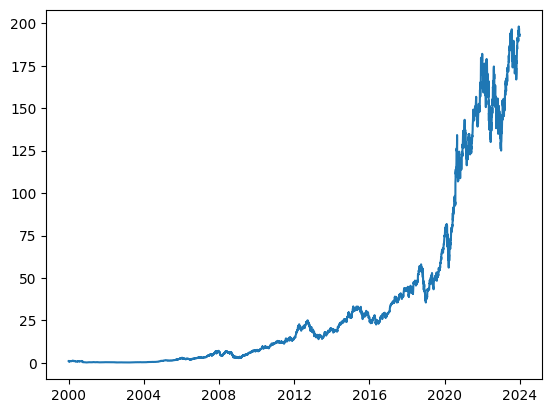

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("AAPL", start='2000-01-03', end='2023-12-30')

print(df.tail())
print(df.describe())

plt.plot(df['Close'])

[*********************100%%**********************]  3 of 3 completed

Ticker          AAPL        FE        WMT
Date                                     
2000-01-03  0.844981  7.440516  14.419453
2000-01-04  0.773741  7.440516  13.879905
2000-01-05  0.785063  7.714528  13.596642
2000-01-06  0.717125  7.735610  13.745014
2000-01-07  0.751094  7.777771  14.783647
Ticker            AAPL         FE        WMT
Date                                        
2023-12-22  193.091385  35.819885  51.859924
2023-12-26  192.542816  35.928642  51.780468
2023-12-27  192.642548  35.908867  52.267124
2023-12-28  193.071426  36.175812  52.164497
2023-12-29  192.024185  36.245018  52.190979
Ticker         AAPL           FE          WMT
count   6037.000000  6037.000000  6037.000000
mean      34.463051    24.472175    21.106066
std       50.717337     8.310898    12.374883
min        0.198078     6.235913     9.366558
25%        1.834633    19.758537    11.832492
50%       12.332439    24.212017    15.025210
75%       39.168842    30.020048    25.846239
max      197.589523    

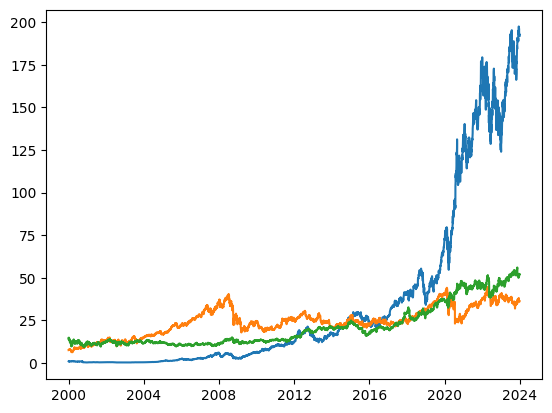

In [11]:
stocks = ['AAPL', 'FE', 'WMT']

stock_prices = yf.download(stocks, start='2000-01-03', end='2023-12-30')['Adj Close']

print(stock_prices.head())
print(stock_prices.tail())
print(stock_prices.describe())

plt.plot(stock_prices)

Ticker          AAPL        FE       WMT
Date                                    
2000-01-03       NaN       NaN       NaN
2000-01-04  0.915690  1.000000  0.962582
2000-01-05  0.929089  1.036827  0.942937
2000-01-06  0.848688  1.039660  0.953227
2000-01-07  0.888889  1.045327  1.025257
Ticker          AAPL        FE       WMT
Date                                    
2000-01-03       NaN       NaN       NaN
2000-01-04 -0.084310  0.000000 -0.037418
2000-01-05  0.014633  0.036827 -0.020408
2000-01-06 -0.086538  0.002733  0.010912
2000-01-07  0.047369  0.005450  0.075564
Ticker
AAPL    7.352462
FE      2.389604
WMT     1.949259
dtype: float64


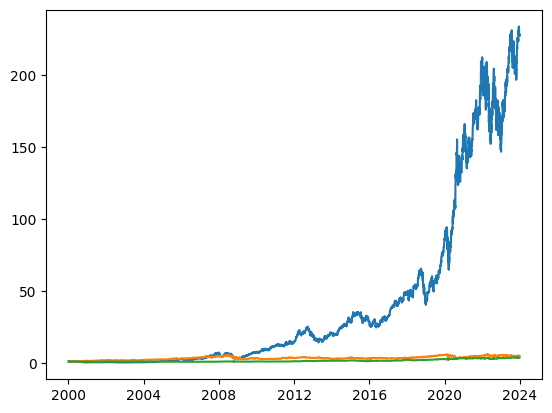

In [15]:
stock_returns = stock_prices.pct_change().dropna()
stock_returns_cumulative = (1 + stock_returns).cumprod()

print(stock_returns_cumulative.head())
print(stock_returns.head())
print(stock_returns.sum())
plt.plot(stock_returns_cumulative)

